In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

from datetime import datetime

In [2]:
timeseries = pd.read_csv('crude-oil-exports-by-type-monthly.csv', header=0,delimiter=',')
timeseries = timeseries.loc[timeseries['Oil Type']=='Total'].filter(['Period','Volume (bbl/d)'])
timeseries['Period'] = timeseries['Period'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y'))
timeseries.set_index(keys='Period',drop=True, inplace=True)
timeseries = timeseries.squeeze(axis=1)
timeseries

Period
1985-06-01    4.074025e+05
1985-07-01    3.680593e+05
1985-08-01    3.925685e+05
1985-09-01    5.325918e+05
1985-10-01    4.984505e+05
                  ...     
2020-11-01    3.774103e+06
2020-12-01    3.789375e+06
2021-01-01    3.883311e+06
2021-02-01    3.719741e+06
2021-03-01    3.658940e+06
Name: Volume (bbl/d), Length: 430, dtype: float64

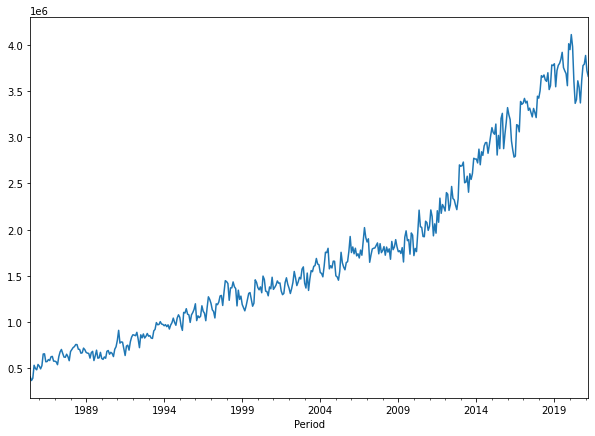

In [3]:
timeseries.plot(figsize=(10, 7))

In [4]:
model = ARIMA(timeseries, order=(5,2,1))
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Volume (bbl/d)   No. Observations:                  430
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -5539.918
Date:                Mon, 31 May 2021   AIC                          11093.836
Time:                        07:49:24   BIC                          11122.250
Sample:                    06-01-1985   HQIC                         11105.058
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3060      0.056     -5.488      0.000      -0.415      -0.197
ar.L2         -0.2196      0.059     -3.723      0.000      -0.335      -0.104
ar.L3         -0.2139      0.053     -4.014      0.000      -0.318      -0.109
ar.L4         -0.2742      0.049     -5.611      0.000      -0.370      -0.178
ar.L5         -0.0927      0.050     -1.857      0.063      -0.191       0.005
ma.L1         -0.9958      0.012    -79.828      0.000      -1.020      -0.971
sigma2      1.297e+10   1.06e-12   1.23e+22      0.000     1.3e+10     1.3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                36.55
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               5.15   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.02e+38. Standard errors may be unstable.
"""

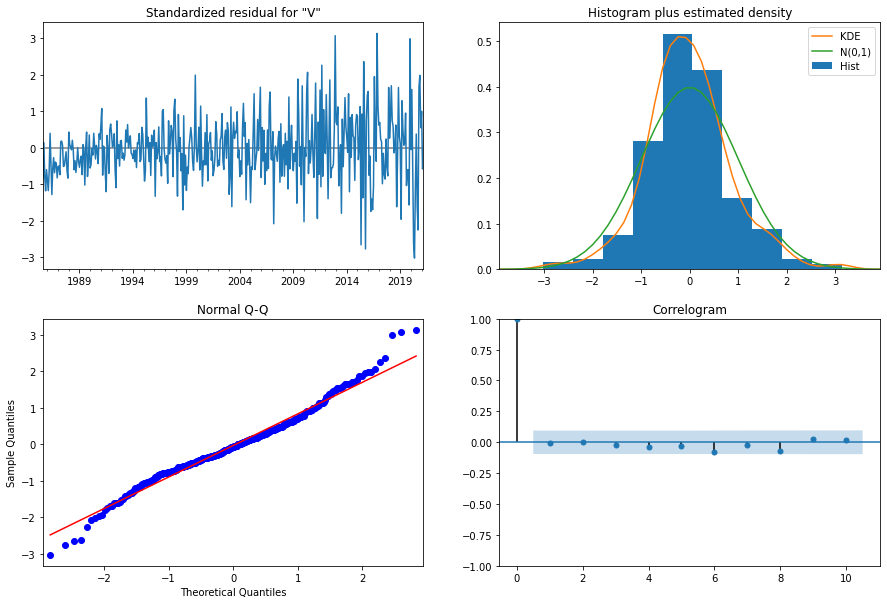

In [5]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

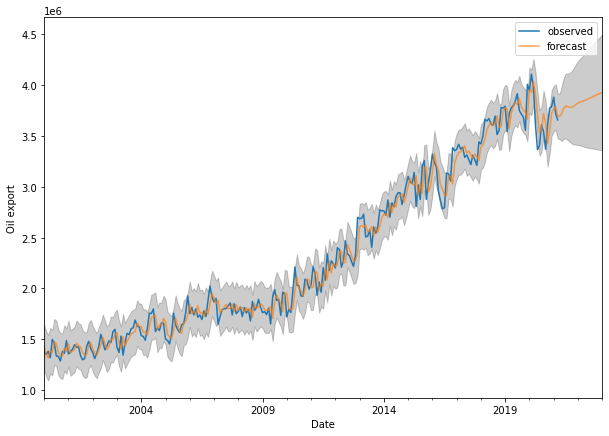

In [5]:
pred = result.get_prediction(start='2000-01-01', end='2023-01-01', dynamic=False)
pred_ci = pred.conf_int()

ax = timeseries['2000':].plot(label='observed', figsize=(10, 7))
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Oil export')
plt.legend()
plt.show()

In [6]:
forecasted = pred.predicted_mean[:'2021-03-01']
actual = timeseries['2000':]
mape = np.mean(np.abs((actual - forecasted)/actual))*100
mape

3.977875393956518